In [2]:
import pandas as pd
import numpy as np



In [3]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [4]:
! python -m spacy download 'en_core_web_sm'

     |████████████████████████████████| 13.9 MB 4.0 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [9]:
df=pd.read_excel("@redbullracing.xlsx",header=[0])




/Users/vennelamuvva/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Web Extension extension is not supported and will be removed
  warn(msg)


In [11]:
df.columns

Index(['Vertex 1', 'Vertex 2', 'Color', 'Width', 'Style', 'Opacity',
       'Visibility', 'Label', 'Label Text Color', 'Label Font Size',
       'Reciprocated?', 'ID', 'Dynamic Filter', 'Add Your Own Columns Here',
       'Relationship', 'Relationship Date (UTC)', 'tweet_text',
       'URLs in Tweet', 'Domains in Tweet', 'Hashtags in Tweet',
       'Media in Tweet', 'Tweet Image File', 'Tweet Date (UTC)', 'Date',
       'Time', 'Twitter Page for Tweet', 'Latitude', 'Longitude',
       'Imported ID', 'In-Reply-To Tweet ID', 'Favorited', 'Favorite Count',
       'In-Reply-To User ID', 'Is Quote Status', 'Language',
       'Possibly Sensitive', 'Quoted Status ID', 'Retweeted', 'Retweet Count',
       'Retweet ID', 'Source', 'Truncated', 'Unified Twitter ID',
       'Imported Tweet Type', 'Added By Extended Analysis',
       'Corrected By Extended Analysis', 'Column4', 'Column5', 'Column6',
       'Column7', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54'],

In [12]:
df['tweet_text'].value_counts()[:10]

🤑 Here's how to be one of 100 lucky users winning $100 in $USDT from Bybit!\n \n➡️ RT this tweet\n \n➡️ Tag 3 friends &amp; fill in this form: https://t.co/vTl1emuThE\n \n➡️ Tweet an encouraging message to @redbullracing &amp; tag @Bybit_Official &amp; #RaceToTheNextLevel https://t.co/UAKjvNNTjW    4543
Just @Max33Verstappen casually racing one-handed 🤯\n\nhttps://t.co/ggQcZeOD6c                                                                                                                                                                                                                               1177
Happy with the first win of the season, let’s keep this going T E A M 👊\n\n@redbullracing https://t.co/hz7Dgml8EQ                                                                                                                                                                                           1055
You're not into Yuki's shoes, @SChecoPerez? 👟😄 https://t.co/vdnE4QbEI3               

In [13]:
df['tweet_text'].nunique()

3102

In [32]:
type(df['Tweet'].unique())

numpy.ndarray

In [14]:
l=[]
for i in df['tweet_text'].unique():
    l.append(i)
   

In [15]:
import spacy

In [16]:
nlp = spacy.load("en_core_web_sm")

In [17]:
def data_cleaner(row):
    doc = nlp(row)
    output = [(token.lemma_).lower() for token in doc if token.is_stop == False and token.is_alpha==True]
    return output

In [9]:
df['Cleaned'] = df['Tweet'].apply(lambda x: data_cleaner(x))

In [18]:
df1=pd.DataFrame(l)
df1[0]=df1[0].apply(lambda x: data_cleaner(x))

In [19]:
df1[0]

0                                                      []
1                                            [yuki, shoe]
2       [mega, racing, today, look, australia, esseref...
3                                                 [start]
4                    [win, congrats, saudiarabiangp, win]
                              ...                        
3097                                [si, lo, daba, fácil]
3098                             [love, therabodypartner]
3099                                    [good, work, lad]
3100    [time, drive, zero, championship, humanerrorch...
3101                                                [let]
Name: 0, Length: 3102, dtype: object

In [20]:
with open('RedbullracingUnique.txt', 'w') as filehandle:
    for li in df1[0]:
        for i in li:
            
            filehandle.write('%s' % i +' ')

In [27]:
!pip install langdetect
from langdetect import detect, detect_langs

def language_detection(text, method = "single"):
    if(method.lower() != "single"):
        result = detect_langs(text)
    else:
        result = detect(text)
    return result

In [28]:
def det(x):
    try:
        lang = detect(x)
    except:
        lang = 'Other'
    return lang

In [30]:
df['Lang'] = df['tweet_text'].apply(det)

In [15]:
df['Lang'].value_counts()

en       18292
es        1771
sv         795
da         768
it         571
de         479
pt         300
fr         262
id         243
et         215
nl         169
ja         138
tr         124
ar         121
af         101
Other       91
no          70
ro          56
tl          37
pl          31
ca          31
so          27
fi          24
sl          11
vi           6
ko           6
cy           4
hu           4
ru           4
lt           3
sw           3
th           2
sq           2
el           2
uk           2
fa           1
hr           1
cs           1
Name: Lang, dtype: int64

In [16]:
df['CLEANED_EN']=df['Cleaned'][df['Lang']=='en']


In [31]:
df['eng_tweets']=df['tweet_text'][df['Lang']=='en']

In [32]:
df['eng_tweets'].nunique()

2507

In [86]:
df['eng_tweets'].unique()

array(['Hulkenberg seguirá pilotando para @AstonMartinF1 en Arabia Saudi. Vettel no ha dado negativo aún en Covid19. \n\nHulkenberg will drive for Aston Martin again in #SaudiArabianGP. Vettel has not tested negative yet.\n#F12022',
       nan,
       '5️⃣ days until we welcome an exclusive group of senior finance and commercial leadership to the 2022 Finance in Sport Forum.\n\nSpeakers including 👉🏼 @KieranMaguire, @AstonMartinF1, @ASRomaEN, @Globalblocknews, @WesternUnion 🙌🏽\n\nLooking forward to seeing everyone after two years! https://t.co/5raKW591OO',
       ..., '@soziluca_sv5 @AstonMartinF1 Thanks Luca!',
       'Hey @AstonMartinF1 give @High5Forever and all of us finally the bucket hat! She deserves it so much! 💚✨',
       '@High5Forever @AstonMartinF1 No problem Rie!'], dtype=object)

In [33]:
l1=[]
for i in df['eng_tweets'].unique():
    l1.append(str(i))

In [34]:
l1

['Which one are you? 😂 https://t.co/1Qjf1J7FWM',
 "You're not into Yuki's shoes, @SChecoPerez? 👟😄 https://t.co/vdnE4QbEI3",
 'Mega racing today! We’ll be looking to get you in Australia 😉 @RedBullRacing\n\n#essereFerrari 🔴 #SaudiArabianGP https://t.co/AH6SfPaRde',
 '2022 has started 🏆🥇 https://t.co/gfhgM8E2a9',
 'P1! 👏 It’s a win for @Max33verstappen! 🏁 🏎 Congrats @RedBullRacing on your #SaudiArabianGP win! #F1 https://t.co/QamCzwJQVM',
 'Happy with the first win of the season, let’s keep this going T E A M 👊\n\n@redbullracing https://t.co/hz7Dgml8EQ',
 'You love to see it. https://t.co/DLr06QcWmy',
 '@redbullracing @SChecoPerez "what are thooooooose!!" Checo version 😂',
 "🤑 Here's how to be one of 100 lucky users winning $100 in $USDT from Bybit!\n \n➡️ RT this tweet\n \n➡️ Tag 3 friends &amp; fill in this form: https://t.co/vTl1emuThE\n \n➡️ Tweet an encouraging message to @redbullracing &amp; tag @Bybit_Official &amp; #RaceToTheNextLevel https://t.co/UAKjvNNTjW",
 '@rubenlm8 @redbul

In [35]:
df2=pd.DataFrame(l1)


In [36]:
df2[0]=df2[0].apply(lambda x: data_cleaner(x))

In [38]:
with open('RedbullracingUnique_eng.txt', 'w') as filehandle:
    for li in df2[0]:
        for i in li:
            
            filehandle.write('%s' % i +' ')

In [95]:
pip install wordcloud

     |████████████████████████████████| 220 kB 1.9 MB/s eta 0:00:01
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158428 sha256=26dd713f11db4b1595fc8f51a0d2d7226d748de9b96dcad5cb4e084b315cf55f
  Stored in directory: /Users/vennelamuvva/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [21]:
import wordcloud as wc
import matplotlib.pyplot as plt

In [39]:
file_text = open("RedbullracingUnique_eng.txt", "r")
text="".join(word for word in file_text)
print(text)

yuki shoe mega racing today look australia essereferrari saudiarabiangp start win congrats saudiarabiangp win happy win season let go t e m love thooooooose checo version lucky user win usdt bybit rt tweet tag friend amp fill form tweet encouraging message amp tag amp racetothenextlevel jajajajajajaja ay wooow parecen de build bear nan checo unlucky latifi accident cause intervention safety car start race confirm excellent efficient confident rest season remain good result team old dutch proverb williams hit guardrail verstappen win race cheeky mondaymotivation require racetothenextlevel amazing project definitely move moon moondao crowdfunde help ordinary people realize dream space travel time mooney handful ordinary people space travel opportunity ground break moondao project vision decentralize space exploration grip rich champions givesyouwing recent tweet hard luck yesterday good competitive race bad sure team retain pole australian gp deserve quick lunch quali cook time 𝘧𝘶𝘭𝘭 𝘴𝘦𝘯𝘥

In [98]:
wordcloud = wc.WordCloud().generate(text)


In [22]:
file_text = open("RedbullracingUnique.txt", "r")
text="".join(word for word in file_text)

In [106]:
wordcloud = wc.WordCloud().generate(text)

In [23]:
wordcloud = wc.WordCloud(background_color ='white',
                         width=1600,height=900,
                         min_font_size = 5,
                         max_words=200).generate(text)

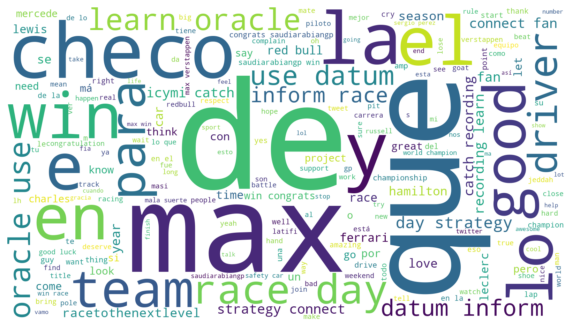

In [24]:
plt.figure(figsize = (10, 10), facecolor=None)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [40]:
wordcloud = wc.WordCloud(background_color ='white',
                         width=1600,height=900,
                         min_font_size = 5,
                         max_words=100).generate(text)

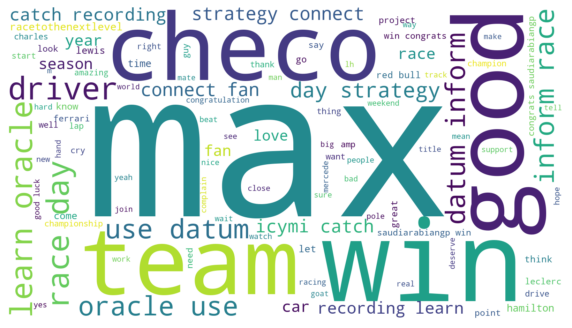

In [41]:
plt.figure(figsize = (10, 10), facecolor=None)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()